In [105]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import constants as cst
# Git path 
import sys, os, git
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
# Import plot functions
sys.path.append(git_path+"/pyplot-perso/")
from color_series1 import colors, mygradient
from functions import complete_panel, save_figure, set_boundaries, \
                      add_subplotlabels, set_boundaries, prepare_figure

In [106]:
sigma = 3 # Angstrom
epsilon = 0.1 # Kcal/mol
mass = 1 # g/mol
kB = cst.Boltzmann*cst.Avogadro/cst.calorie/cst.kilo # kCal/mol/K
reference_temperature = epsilon/kB # K
mass_kg = mass/cst.kilo/cst.Avogadro # kg
epsilon_J = epsilon*cst.calorie*cst.kilo/cst.Avogadro # J
sigma_m = sigma*cst.angstrom # m
time_s = np.sqrt(mass_kg*sigma_m**2/epsilon_J) # s
reference_time = time_s / cst.femto # fs
pressure_pa = epsilon_J/sigma_m**3 # Pa
reference_pressure = pressure_pa/cst.atm # atm

In [107]:
rho_mdcode = []
pres_mdcode = []
N_atoms = 50
T_star = 2*reference_temperature
for rho_star in np.arange(0.1, 0.71, 0.2):
    desired_L_star = (N_atoms/rho_star)**(1/3)
    desired_L = desired_L_star * sigma
    rho_mdcode.append(rho_star)
    path = "molecular-dynamics/mdcode-rho"+str(np.round(rho_star,3))+"/pressure.dat"
    time, pres_vs_time = np.loadtxt(path).T
    mean_pres = np.mean(pres_vs_time[50:])
    std_pres = np.std(pres_vs_time[50:])/np.sqrt(len(pres_vs_time[50:]))
    pres_mdcode.append([mean_pres/reference_pressure, std_pres/reference_pressure])
rho_mdcode = np.array(rho_mdcode)
pres_mdcode = np.array(pres_mdcode)

In [108]:
pres_lammps = []
rho_lammps = []
for rho_star in np.arange(0.03, 0.94, 0.02):
    rho_lammps.append(rho_star)
    path = "molecular-dynamics/lammps-rho"+str(np.round(rho_star,3))+"/pressure.dat"
    time, pres_vs_time = np.loadtxt(path).T
    mean_pres = np.mean(pres_vs_time[50:])
    std_pres = np.std(pres_vs_time[50:])/np.sqrt(len(pres_vs_time[50:]))
    pres_lammps.append([mean_pres/reference_pressure, std_pres/reference_pressure])
pres_lammps = np.array(pres_lammps)
rho_lammps = np.array(rho_lammps)

In [109]:
FrenkelSmit_highpressure = np.loadtxt(git_path + "/applications/equation-of-state/literature/FrenkelSmit_highpressure.dat")
FrenkelSmit_lowpressure = np.loadtxt(git_path + "/applications/equation-of-state/literature/FrenkelSmit_lowpressure.dat")

/home/simon/Git/MDCourse/applications/pyplot-perso/functions.py:156: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(y_boundaries)
/home/simon/Git/MDCourse/applications/pyplot-perso/functions.py:134: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.tight_layout()
/home/simon/Git/MDCourse/applications/pyplot-perso/functions.py:138: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(git_root + path_figures + filename + "-light.png",
/home/simon/Git/MDCourse/applications/pyplot-perso/functions.py:138: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(git_root + path_figures + filename + "-light.png",
/home/simon/Git/MDCourse/applications/pyplot-perso/functions.py:138: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(git_root + path_figures + filename + "-light.png",
/home/simon/Git/MDCourse/applications/

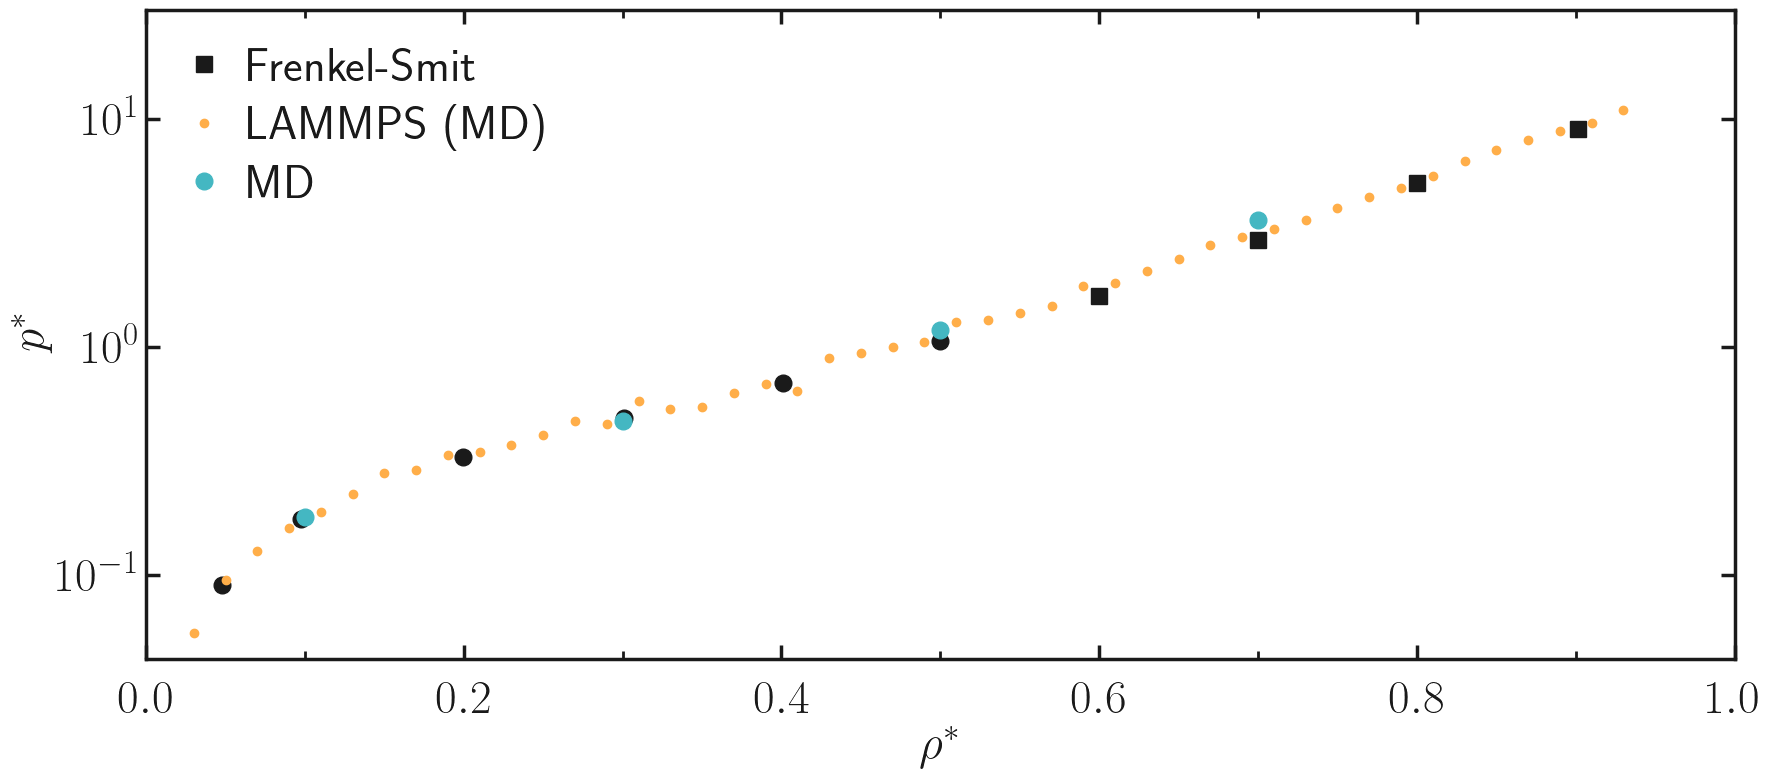

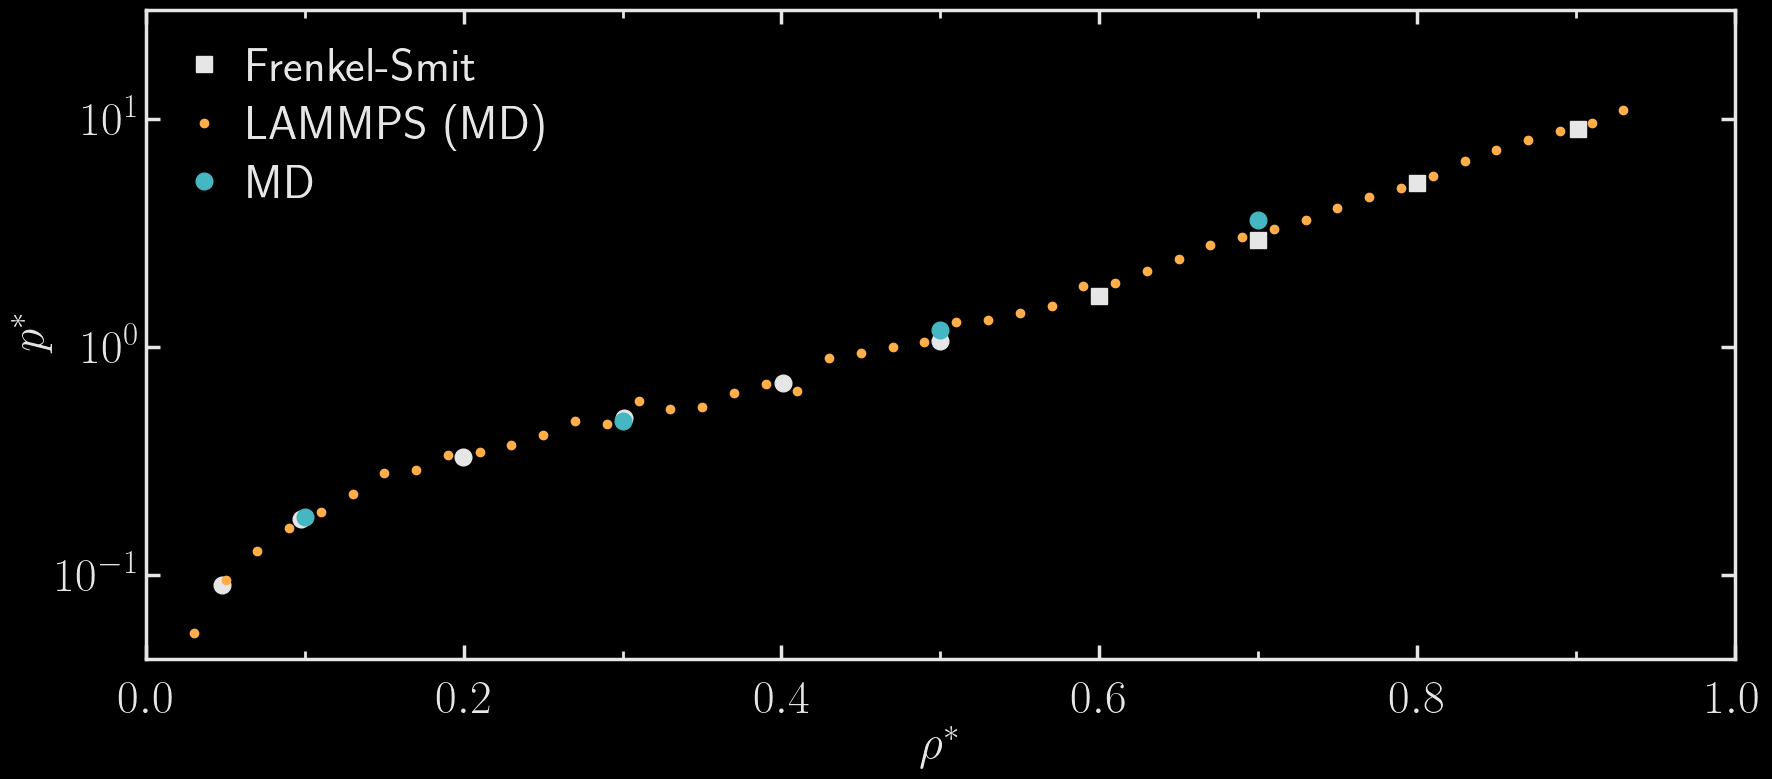

In [111]:
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):
    fig = prepare_figure(mode, transparency = False, desired_figsize=(18,8))
    ax, n, l_tot, c_tot = [], 0, 1, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].semilogy(FrenkelSmit_highpressure[:,0], FrenkelSmit_highpressure[:,1], 's', color=mygray,
            markersize = 12, linewidth=4, label="Frenkel-Smit") 
    ax[-1].semilogy(FrenkelSmit_lowpressure[:,0], FrenkelSmit_lowpressure[:,1], 'o', color=mygray,
            markersize = 12, linewidth=4) 
    ax[-1].semilogy(rho_lammps, pres_lammps[:,0], '.', color=colors["myorange"],
            markersize = 12, linewidth=4, label="LAMMPS (MD)") 
    ax[-1].semilogy(rho_mdcode, pres_mdcode[:,0], 'o', color=colors["mycyan"],
            markersize = 12, linewidth=4, label="MD") 
    complete_panel(ax[-1], r'$\rho^*$', r'$p^*$',
                    legend=True, axis_color=mygray, xpad=15,
                    locator_x=2, locator_y=2)
    set_boundaries(plt, x_boundaries=(0, 1), y_boundaries=(0, 30))
    save_figure(plt, fig, mode, git_path, "/applications/equation-of-state/",
                "equation-of-state", transparency = False)